# CH.02 - 2.5.2.2

In [ ]:
from Chapter2.CreateDataset import CreateDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
from util.VisualizeDataset import VisualizeDataset
from util import util
plt.rcParams["figure.figsize"] = [15,5]

In [2]:
rawdatapth = "data/given/"
outputpth = "data/intermediate/"

if not os.path.exists(outputpth):
    print("Empty path, so creating..." + outputpth + "...done!")
    os.makedirs(outputpth)

Reading data from accelerometer_phone.csv
Reading data from gyroscope_phone.csv
Reading data from light_phone.csv
Reading data from location_phone.csv
Reading data from magnetometer_phone.csv
Reading data from labels.csv
Figure saved to figures\figure_1.png


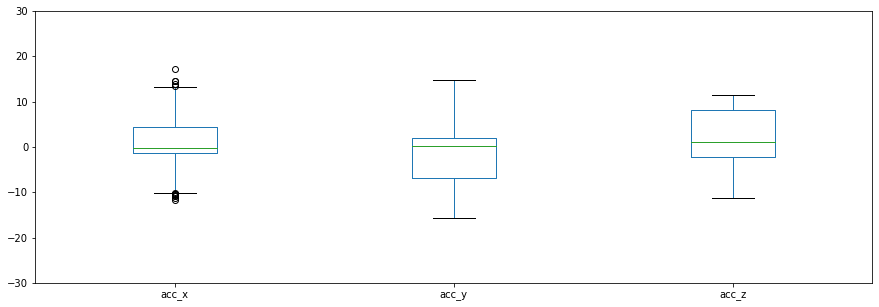

Figure saved to figures\figure_2.png


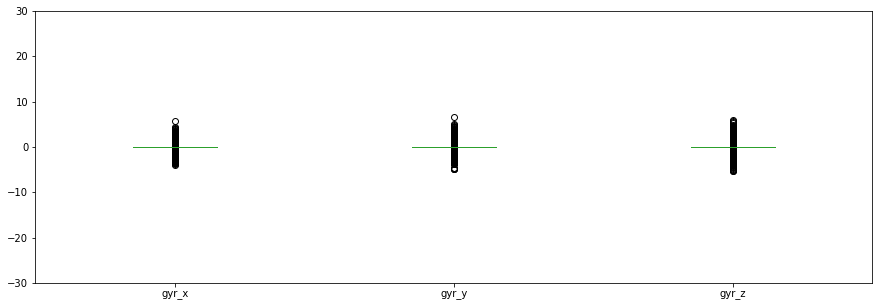

Figure saved to figures\figure_3.png


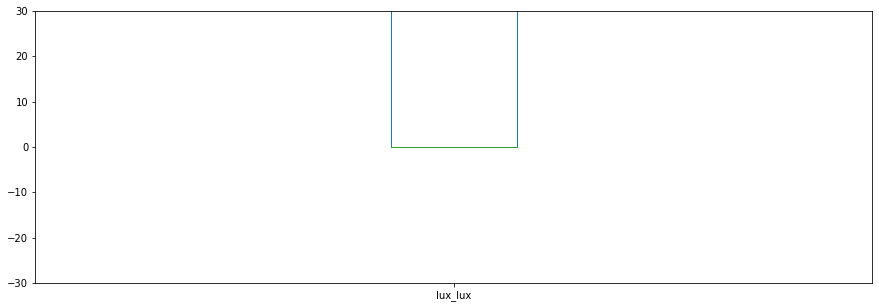

Figure saved to figures\figure_4.png


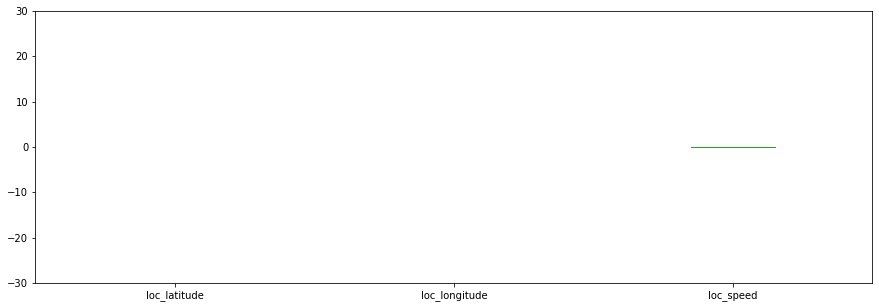

Figure saved to figures\figure_5.png


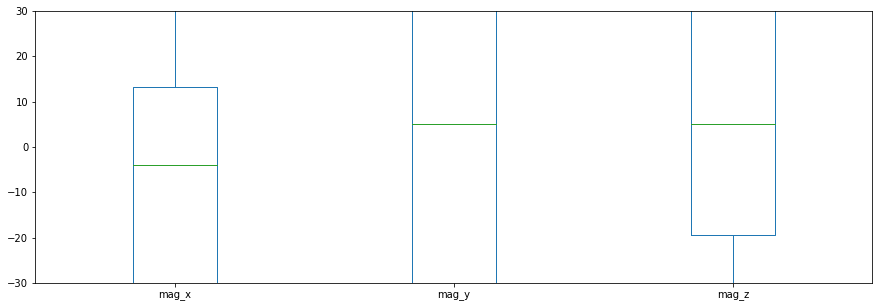

Figure saved to figures\figure_6.png


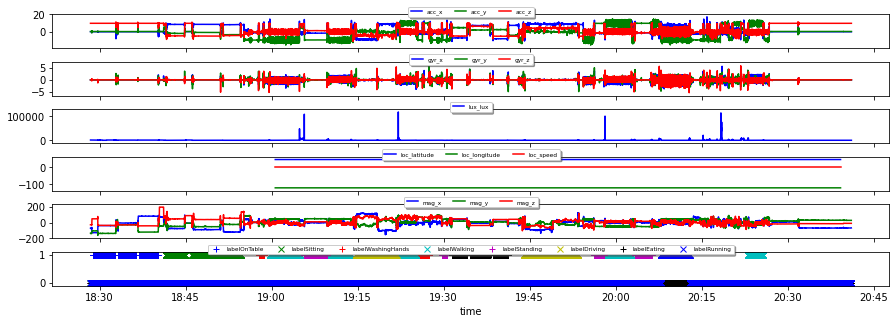

           gyr_x      gyr_y      gyr_z     lux_lux  loc_latitude  loc_longitude  loc_speed      mag_x      mag_y      mag_z  labelOnTable  labelSitting  labelWashingHands  labelWalking  labelStanding  labelDriving  labelEating  labelRunning
count  31838.000  31838.000  31838.000   28517.000       154.000        154.000      154.0  31834.000  31834.000  31834.000     31838.000     31838.000          31838.000     31838.000      31838.000     31838.000    31838.000     31838.000
mean      -0.000      0.024     -0.003     281.508        47.546       -122.038        0.0    -13.524     -3.800      7.572         0.078         0.086              0.020         0.147          0.073         0.124        0.068         0.038
std        0.566      0.427      0.516    2220.903         0.003          0.019        0.0     50.616     47.920     40.012         0.269         0.280              0.139         0.355          0.260         0.330        0.252         0.191
min       -3.984     -4.945     -5.3

In [3]:
Dataset = CreateDataset(rawdatapth, 250)

Dataset.add_numerical_dataset("accelerometer_phone.csv", "timestamps", ["x", "y", "z"], "avg", "acc_")

Dataset.add_numerical_dataset("gyroscope_phone.csv", "timestamps", ["x", "y", "z"], "avg", "gyr_")
    
Dataset.add_numerical_dataset("light_phone.csv", "timestamps", ["lux"], "avg", "lux_")
    
Dataset.add_numerical_dataset("location_phone.csv", "timestamps", ["latitude", "longitude", "speed"], "avg", "loc_")
    
Dataset.add_numerical_dataset("magnetometer_phone.csv", "timestamps", ["x", "y", "z"], "avg", "mag_")
    
Dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

dataset = Dataset.data_table
    
Dataviz = VisualizeDataset()
    
Dataviz.plot_dataset_boxplot(dataset, ['acc_x', 'acc_y', 'acc_z'])
Dataviz.plot_dataset_boxplot(dataset, ['gyr_x', 'gyr_y', 'gyr_z'])
Dataviz.plot_dataset_boxplot(dataset, ['lux_lux'])
Dataviz.plot_dataset_boxplot(dataset, ['loc_latitude', 'loc_longitude', "loc_speed"])
Dataviz.plot_dataset_boxplot(dataset, ['mag_x', 'mag_y', 'mag_z'])

Dataviz.plot_dataset(dataset, ["acc_", "gyr_", "lux_", "loc_", "mag_", "label"], \
                            ["like", "like", "like", "like", "like", "like"], \
                            ["line", "line", "line", "line", "line", "points"])
   
    
util.print_statistics(dataset)

In [4]:
print(dataset.columns)

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'lux_lux',
       'loc_latitude', 'loc_longitude', 'loc_speed', 'mag_x', 'mag_y', 'mag_z',
       'labelOnTable', 'labelSitting', 'labelWashingHands', 'labelWalking',
       'labelStanding', 'labelDriving', 'labelEating', 'labelRunning'],
      dtype='object')


In [5]:
dataset_walking = dataset[dataset['labelWalking'] == 1]
print(dataset_walking['acc_x'].min(), dataset_walking['acc_y'].min(), dataset_walking['acc_z'].min())
print(dataset_walking['acc_x'].mean(), dataset_walking['acc_y'].mean(), dataset_walking['acc_z'].mean())
print(dataset_walking['acc_x'].std(), dataset_walking['acc_y'].std(), dataset_walking['acc_z'].std())
util.print_statistics(dataset_walking, describe=True)

-11.757859999999999 -15.54813725490196 -8.001686274509805
-0.14251107696814413 0.3237524641709327 -0.10487446877696159
1.5612372809099655 9.856553426387196 2.1345462296945974
          gyr_x     gyr_y     gyr_z     lux_lux  loc_latitude  loc_longitude  loc_speed     mag_x     mag_y     mag_z  labelOnTable  labelSitting  labelWashingHands  labelWalking  labelStanding  labelDriving  labelEating  labelRunning
count  4694.000  4694.000  4694.000    4214.000        32.000         32.000       32.0  4694.000  4694.000  4694.000        4694.0        4694.0             4694.0        4694.0         4694.0        4694.0       4694.0        4694.0
mean      0.004     0.032     0.017     153.687        47.546       -122.042        0.0    -0.270     8.003     7.661           0.0           0.0                0.0           1.0            0.0           0.0          0.0           0.0
std       0.982     0.556     0.744    2427.367         0.003          0.020        0.0    18.786    38.734    29.788   